Tên: Nguyễn Thọ Anh Khoa

Facebook: Khoa Nguyễn KT

Lớp: AI Insight 

# Tensorflow – Exercise 1

## 1) Các bạn đọc qua trang (https://www.tensorflow.org/guide/tensor) để xem qua nội dung về tensor và quay lại tham khảo khi cần.

- Tensor là một arrays có nhiều chiều và các phần tử trong array là đồng nhất cùng type (dtype). Có thể hiểu tensor tương tự như np.arrays

- Tensors là immutable cái mà chỉ được tạo ra chứ không thể update được nội dung.

- Type mặc định của tensors là sẽ là **32**

- Rank của tensor chính là số chiều của nó (ví dụ scalar là rank o, vecotr là rank 1, ...)

- Có thể convert tensor sang numpy bằng cách dùng **np.array(tensor)** hoặc **tensor.numpy()**



In [3]:
import tensorflow as tf
tf.__version__

'2.0.0-rc1'

In [18]:
# Cách khai báo 1 tensor
print('Tensor rank0: ', tf.constant(4))
print('Tensor rank1:', tf.constant([2.0, 3.0, 4.0]))
print('Tensor rank2: ', tf.constant([[1,2], [3,4], [5,6]]) )

Tensor rank0:  tf.Tensor(4, shape=(), dtype=int32)
Tensor rank1: tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
Tensor rank2:  tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


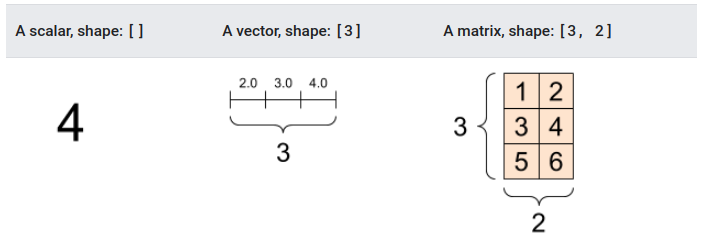

Các operation cơ bản hay dùng trong tensor là

- **element-wise multiplication:** tf.multiply(tf_a, tf_b) or tf_a * tf_b

- **matrix multiplication:** tf.matmul(tf_a, tf_b) or tf_a @ tf_b

- **Tìm giá trị lớn nhất:** tf.reduce_max(tf_a)

- **Tìm vị trí của giá trị lớn nhất:** tf.argmax(c)

In [20]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(a*b, "\n")
print(tf.matmul(a, b), "\n")
print(a@b, "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



**Rank:** **(tensor.ndim)** Số lượng chiều của 1 tensor

**Shape:** **(tensor.shape)**Số lượng element trong mỗi Axis (chiều) của 1 tensor

**Axis:** **(tensor.shape[axis_th])**Là 1 chiều cụ thể trong tensor 

**Size:** **(tf.size(tensor).numpy())**Tổng số element trong 1 tensor 

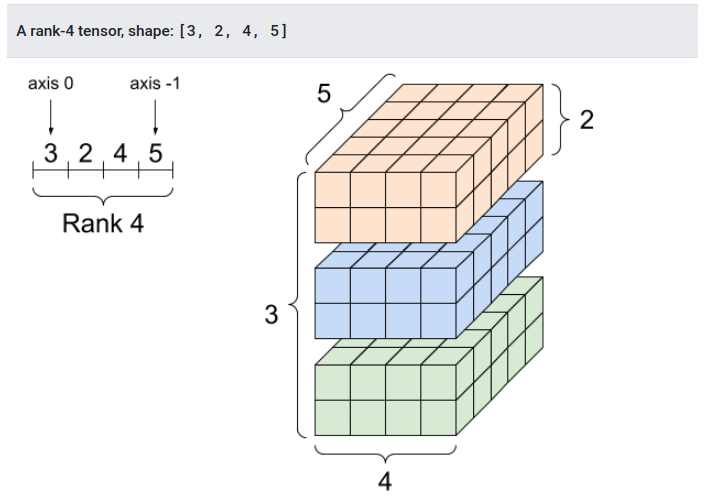

Tensor có các tính chất tương tự như numpy
- Indexing: index với scalar sẽ giảm chiều, và index với ':' thì giữ chiều 
- Reshape: thay đổi shape với cùng size, data sẽ được duy trì trong memory và tensor mới với shape mình mong muốn sẽ được tạo ra và thứ tự của các index tuân theo C-style 'row-major'. Lưu ý khi reshape, phải lưu ý các chiều để có được kết quả mong muốn, chứ không thể tùy ý reshape dẫn đên các row ban đầu bị xếp hỗn độn.
- Broadcasting: Khi thực hiện các operation như cộng, trừ, nhân, chia tensor có shape khác nhau thì tensor có shape nhỏ hơn sẽ được duplicate các vị trí còn thiếu để được shape tương ứng như tensor có shape lớn hơn. (lưu ý không phải shape nào cũng broadcast được)


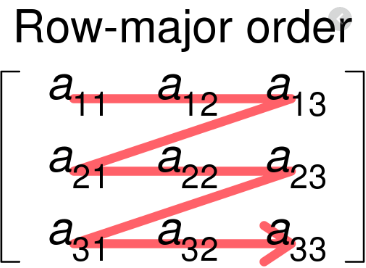


Ví dụ shape 3x2x5 thì có thể reshape về  (3x2)x5 hoặc 3x(2x5), không nên reshape về nếu mình không mong muốn element được sắp xếp như vậy 5x(2x3), 2x3x5 , và tổng số element không bằng shape trước đó 

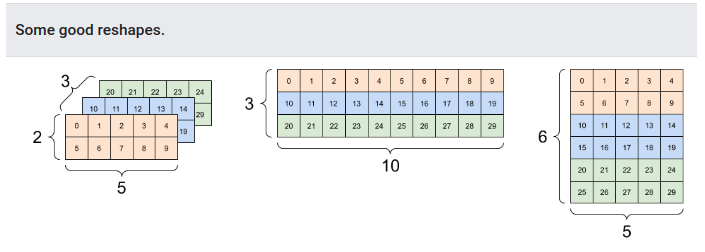

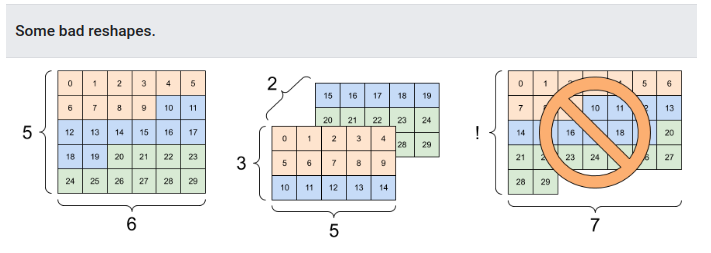

**Ragged Tensors:** là tensor có hình dạng không là non-rectangular (không phải là hình chữ nhật), và thường sẽ có ít nhất 1 axis là None trong shape. **(tf.ragged.constant(ragged_list))**
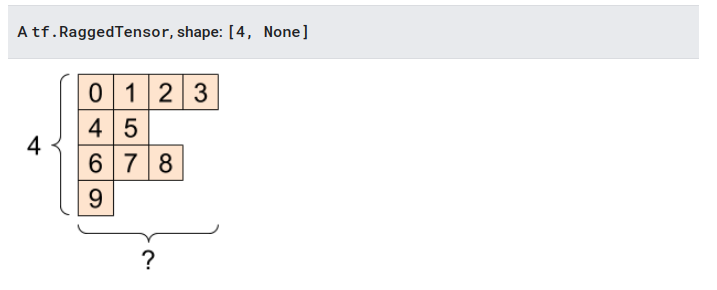

**Sparse tensor:** chỉ có 1 vài elment có giá trị > 0 còn lại đa phần là 0

**tf.sparse.SparseTensor(indices, values, dense_shape)**
**tf.sparse.to_dense(sparse_tensor)**

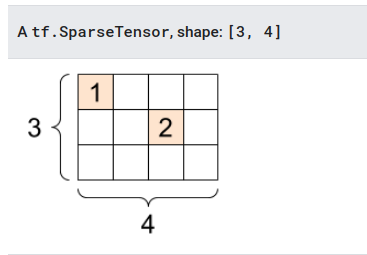

## 2) Các bạn đọc qua trang (https://www.tensorflow.org/guide/autodiff) để xem qua nội dung về gradient tape và quay lại tham khảo khi cần.

**Gradient tapes** Cách thức hoạt động của gradient tapes là sẽ record các operations trong step forward như 1 tape và rồi thực hiện đạo hàm theo thứ tự ngược lại các operations. Để có thể đạo hàm được thì sử dụng **tf.Variable**

In [33]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)
[dl_dw, dl_db] = tape.gradient(loss, [w, b]) # derivate loss respect to w, and b
print(dl_dw)
print(dl_db)

tf.Tensor(
[[1.6660349 1.4829863]
 [3.3320699 2.9659727]
 [4.998105  4.448959 ]], shape=(3, 2), dtype=float32)
tf.Tensor([1.6660349 1.4829863], shape=(2,), dtype=float32)


đạo hàm cũng có thể thực hiện bằng cách đưa vào 1 dictionary 

In [32]:
my_vars = {
    'w': w,
    'b': b
}

grad = tape.gradient(loss, my_vars)
grad['b']

<tf.Tensor: id=174, shape=(2,), dtype=float32, numpy=array([ 0.5113667, -1.0244544], dtype=float32)>

**Gradients with respect to a model** bởi vì khi thực hiện backward trong deeplearning hoặc machinelearning ta cần thực hiện trên model, do đó khi 1 model hoặc các subclasses như layer được đưa vào các trainable_variables sẽ được thực hiện đạo hàm 

In [35]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

for var, g in zip(layer.trainable_variables, grad):
  print(f'{var.name}, shape: {g.shape}')

dense_1/kernel:0, shape: (3, 2)
dense_1/bias:0, shape: (2,)


**A variable + tensor returns a tensor.**
Chỉ đạo hàm những variables được watch by tape 
[var.name for var in tape.watched_variables()]



Để record gradient với 1 tf.Tensor thì có thể sử  dụng **GradientTape.watch(x)**. Ngược lại nếu không muốn watch các variables ta có thể sử dụng **watch_accessed_variables=False**

In [36]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
  tape.watch(x) # watch 
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [37]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch(x1)
  y0 = tf.math.sin(x0)
  y1 = tf.nn.softplus(x1)
  y = y0 + y1
  ys = tf.reduce_sum(y)

# dy = 2x * dx
grad = tape.gradient(ys, {'x0': x0, 'x1': x1})

print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())

dy/dx0: None
dy/dx1: 0.9999546


Mặc định thì GradientTape (tape) sẽ được giải phóng ngay khi GradientTape.gradient() (tape.gradient) được gọi. để tránh trường hợp này **persistent=True** sẽ được sử dụng để cho phép gọi **.gradient** nhiều lần, và nó chỉ được giải phóng khi object này bị delete và python xóa đi trong garbage collection (del tape)

**Khi sử dụng persistent=True các intermedia results sẽ được giữ lại dó đó có thể đẩy memory lên cao hơn**

In [41]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = y * y

print(tape.gradient(y, x).numpy())  # 108.0 (4 * x**3 at x = 3)
print(tape.gradient(y, x).numpy())  # 6.0 (2 * x)

[2. 6.]
[2. 6.]


**Gradients of non-scalar targets:** Thông thường garidient là 1 operation đối với scalar, nếu target là 1 list (nhiều target) thì kết quả trả về sẽ là 
- Gradient của tổng các targets
- Tổng gradient của mỗi target

-> phù hợp cho sử dụng multi-tasking

Nếu muốn các gradient thực hiện độc lập có thể sử dụng [jacobians](https://www.tensorflow.org/guide/advanced_autodiff#jacobians)

In [45]:
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient(y0, x).numpy())
print(tape.gradient(y1, x).numpy())

################################################
print('########## Tổng của gradient của mỗi target ##########')
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())

################################################
print('########## Gradient của tổng các target ##########')
x = tf.Variable(2.)

with tf.GradientTape() as tape:
  y = x * [3., 4.]

print(tape.gradient(y, x).numpy())

4.0
-0.25
########## Tổng của gradient của mỗi target ##########
3.75
########## Gradient của tổng các target ##########
7.0


**Getting a gradient of None** một số lỗi sai logic dẫn đến gradient là none 

- 1 variable + tensor hoặc constant sẽ trở thành tensor (gradient của tensor là None) -> giải quyết bằng dùng Variable.asign (ví dụ )
- Các path trong scope của GradientTape không là tensorflow 
- Các variable trước khi đưa vào trong scope của GradientTape phải là float 


In [104]:
x = tf.Variable(2.0)

for epoch in range(2):
  with tf.GradientTape() as tape:
    y = x+1

  print(type(x).__name__, ":", tape.gradient(y, x))
  x = x + 1   # This should be `x.assign_add(1)`

ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
EagerTensor : None


In [110]:
x = tf.Variable([[1.0, 2.0],
                 [3.0, 4.0]], dtype=tf.float32)

with tf.GradientTape() as tape:
  x2 = x**2

  # This step is calculated with NumPy
  y = np.mean(x2, axis=0)

  # Like most ops, reduce_mean will cast the NumPy array to a constant tensor
  # using `tf.convert_to_tensor`.
  y = tf.reduce_mean(y, axis=0)

print(tape.gradient(y, x))

None


Một số operation không được register hệ thống sẽ raise error thay vì trả về None 

Trong một số trường hợp có thể trả về 0 thay vì none 
tape.gradient(z, x, unconnected_gradients=tf.UnconnectedGradients.ZERO)

## 3) Các bạn chạy lại các ví dụ minh họa ở slide bài học 5

Phần lớn các ví dụ về tensorflow như operations và gradient tape đã được thực hiện ở trên nên các ví dụ dưới đây là về  train model 

Class in Python

In [390]:
class SGD:
    def __init__(self, lr):
        self.lr = lr
    def __call__(self, value):
        self.lr = self.lr + value
sgd_instance = SGD(0.1)
sgd_instance(0.3)
sgd_instance.lr

0.4

In [367]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

Model Construction Linear Regression

In [380]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
tf.keras.backend.set_floatx('float64')
# Data preparation
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1, dtype=np.float64)
scaled_data = scaler.fit_transform(data)
X = scaled_data[:, 0:3]
y = scaled_data[:, 3:]

batch_size, epochs = 4, 10

# create model
# LiR_model = keras.Sequential()
# LiR_model.add(keras.Input(shape=(3,)))
# LiR_model.add(keras.layers.Dense(1))
LiR_model = keras.Sequential(keras.layers.Dense(units=1, input_shape=[3]))
LiR_model.summary()

opt = keras.optimizers.SGD(learning_rate=0.01)
LiR_model.compile(optimizer=opt, loss='mse')

history = LiR_model.fit(X,y, batch_size, epochs)



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.3838
Epoch 2/10
200/200 [==============================] - 0s 391us/sample - loss: 0.1480
Epoch 3/10
200/200 [==============================] - 0s 399us/sample - loss: 0.1082
Epoch 4/10
200/200 [==============================] - 0s 369us/sample - loss: 0.1014
Epoch 5/10
200/200 [==============================] - 0s 390us/sample - loss: 0.0997
Epoch 6/10
200/200 [==============================] - 0s 417us/sample - loss: 0.0990
Epoch 7/10
200/200 [==============================] - 0s 383us/sample - loss: 0.0992
Epoch 8/10
200/200 [===================

Model Construction Logistic Regression

In [385]:
from sklearn.preprocessing import MinMaxScaler

#Load data
data = np.genfromtxt('iris_full_2classes.csv', delimiter=',', skip_header=1)
X = data[:, 0:4]
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
X = scaled_X
y = data[:, 4:]

batch_size, epochs = 4, 10
# LoR_model = keras.Sequential()
# LoR_model.add(keras.Input(shape=(4,)))
# LoR_model.add(keras.layers.Dense(1, activation='sigmoid'))
LoR_model = keras.Sequential(keras.layers.Dense(units=1, input_shape=[4], activation='sigmoid'))
LoR_model.summary()

opt = keras.optimizers.SGD(learning_rate=0.1)
LoR_model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy())

history = LoR_model.fit(X,y,batch_size, epochs)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 4ms/sample - loss: 0.5825
Epoch 2/10
100/100 [==============================] - 0s 477us/sample - loss: 0.4671
Epoch 3/10
100/100 [==============================] - 0s 456us/sample - loss: 0.3999
Epoch 4/10
100/100 [==============================] - 0s 429us/sample - loss: 0.3495
Epoch 5/10
100/100 [==============================] - 0s 469us/sample - loss: 0.3089
Epoch 6/10
100/100 [==============================] - 0s 491us/sample - loss: 0.2766
Epoch 7/10
100/100 [==============================] - 0s 436us/sample - loss: 0.2502
Epoch 8/10
100/100 [===================

Model Construction Softmax

In [388]:
from sklearn import preprocessing

tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
X = preprocessing.scale(X)

batch_size, epochs = 4, 10

# Sm_model = keras.Sequential()
# Sm_model.add(keras.Input(shape=(4,)))
# Sm_model.add(keras.layers.Dense(3, activation='softmax'))
Sm_model = keras.Sequential(keras.layers.Dense(units=3, input_shape=[4], activation='softmax'))
Sm_model.summary()

opt = keras.optimizers.SGD(learning_rate=0.1)
Sm_model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy())

history = Sm_model.fit(X,y,batch_size, epochs)


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples
Epoch 1/10
150/150 [==============================] - 0s 2ms/sample - loss: 0.6099
Epoch 2/10
150/150 [==============================] - 0s 465us/sample - loss: 0.3914
Epoch 3/10
150/150 [==============================] - 0s 465us/sample - loss: 0.3312
Epoch 4/10
150/150 [==============================] - 0s 432us/sample - loss: 0.2967
Epoch 5/10
150/150 [==============================] - 0s 413us/sample - loss: 0.2752
Epoch 6/10
150/150 [==============================] - 0s 493us/sample - loss: 0.2549
Epoch 7/10
150/150 [==============================] - 0s 472us/sample - loss: 0.2389
Epoch 8/10
150/150 [=================

## 4) Đọc hiểu code file ‘Softmax-Researcher.ipynb’ về cách cài đặt bài softmax regression dùng Gradient tape trong tensorflow.

Các step của softmax tương tự như homework trước, chỉ khác về  cách thực hiện trên numpy còn phần này thực hiện trên tensorflow.

- Hàm predict dùng functon tf.math.softmax() của tensorflow để tìm softmax

- Ở phần weight, W, và b được khai báo đôc lập để thực hiện giống theo công thức và phù hợp với hàm predict ở trên, nhưng cũng có thể gộp W và b thành 1 variable 

- Loss ở đây được sử dụng là SparseCategoricalCrossentropy() Sparse sẽ có tính năng giống như convert label thành one_hot_encoding

- Các biến tham gia trong đạo hàm sẽ luôn được duy trì như variable của tensorflow chỉ có loss sẽ được lấy ra theo như numpy thay vì tensor để show trên graph.


In [366]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing

tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
X = preprocessing.scale(X)


# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### weights
W = tf.Variable(tf.random.normal((4, 3), dtype=tf.float64))
b = tf.Variable([0.01, 0.01, 0.01], dtype=tf.float64)

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, W, b)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

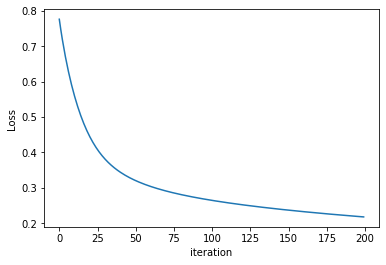

In [132]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [131]:
preds = predict(X, W, b)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class.shape)
print(y.shape)

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

(150,)
(150, 1)
0.9466666666666667


## 5) (Optional) Cài lại bài Linear regression và Logistic regression dùng Gradient tape trong tensorflow

**Linear regression**

In [361]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
tf.keras.backend.set_floatx('float64')
# Data preparation
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1, dtype=np.float64)
scaled_data = scaler.fit_transform(data)
X = scaled_data[:, 0:3]
X = X.T
y = scaled_data[:, 3:]
y = y.T
#predict
def predict(x, W, b):
    return tf.matmul(tf.transpose(W), x) + b

#Initial weight
b = tf.Variable(1, dtype=tf.float64)
W = tf.Variable(tf.random.normal((3,1),dtype=tf.float64), dtype=tf.float64)

#Training hyperparameter
epochs = 50
lr = 0.1

loss = tf.keras.losses.MSE

losses = []
idxs = np.arange(X.shape[1])
for epoch in range(epochs):
    np.random.shuffle(idxs)
    X = X[:, idxs]
    y = y[:, idxs]
    with tf.GradientTape() as tape:
        #predict
        output = predict(X, W, b)
        
        #loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        #gradient
        dW, db = tape.gradient(loss_v,[W, b])
        
        #update
        W.assign_sub(lr*dW)
        b.assign_sub(lr*db)
        



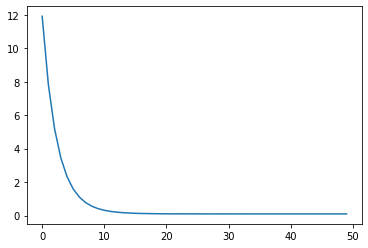

In [362]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

**Logistic regression**

In [363]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#Load data
data = np.genfromtxt('iris_full_2classes.csv', delimiter=',', skip_header=1)
X = data[:, 0:4]
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
X = scaled_X.T
y = data[:, 4:]
y = y.T



#predict
def predict(X,W,b):
    return tf.math.sigmoid((tf.matmul(tf.transpose(W), X) + b))

#Initial weights
b = tf.Variable(0.5, dtype=tf.float64)
W = tf.Variable(tf.random.normal((4,1), dtype=tf.float64), dtype=tf.float64)

#Training parameter
epochs = 100
lr = 1.0

#loss function
loss = tf.keras.losses.BinaryCrossentropy()
losses = []
idxs = np.arange(X.shape[1])
for epoch in range(epochs):
    np.random.shuffle(idxs)
    X = X[:, idxs]
    y = y[:, idxs]
    with tf.GradientTape() as tape:
        #predict 
        output = predict(X,W,b)
        
        #loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        #gradient
        db, dW = tape.gradient(loss_v, [b, W])
        
        #updae
        W.assign_sub(lr*dW)
        b.assign_sub(lr*db)

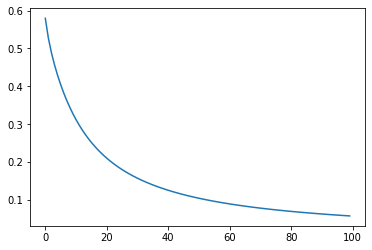

In [364]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [365]:
res = tf.math.round(predict(X,W,b))
np.mean(res==y)

1.0